In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.graph_objects as go


In [2]:
#Reading Statewise data detailing Education in India
se=pd.read_csv(r'2015_16_Statewise_Elementary.csv')
se.head()


,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,...,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,JAMMU & KASHMIR,22,201,7263,1628,12549,20.05,16.01,...,1014,20491,1946,41171,62474,7878,564,495,24326,2001
1,2015-16,2,HIMACHAL PRADESH,12,124,10120,2243,6857,8.69,11.14,...,652,36054,3053,38307,6930,6909,6498,5445,6151,2717
2,2015-16,3,PUNJAB,22,146,13197,1780,27704,29.82,10.62,...,2754,88618,14200,56222,23531,42532,9244,8406,30835,7218
3,2015-16,4,CHANDIGARH,1,20,84,20,1055,97.25,11.18,...,117,1994,218,135,419,2066,0,36,1398,0
4,2015-16,5,UTTARAKHAND,13,95,11989,995,10117,21.54,13.14,...,1147,12608,1024,48215,14587,7545,12388,6671,1855,3227


In [3]:
#Reading the Statewise Elementary Metadata which allows us to see what each column head means
sem = pd.read_csv(r'2015_16_Statewise_Elementary_Metadata.csv')
sem.head(10)

,Field name,Description
0,AC_YEAR,AC_YEAR: AC_YEAR
1,STATCD,Data Reported from: Data Reported from
2,STATNAME,Data Reported from: Data Reported from
3,DISTRICTS,Data Reported from: Data Reported from
4,BLOCKS,Data Reported from: Data Reported from
5,VILLAGES,Data Reported from: Data Reported from
6,CLUSTERS,Data Reported from: Data Reported from
7,TOTPOPULAT,Basic data from Census 2011: Total Population(...
8,P_URB_POP,Basic data from Census 2011: Percentage Urban ...
9,POPULATION_0_6,Basic data from Census 2011: Percentage Popula...


In [4]:
def col_des(col):
        return sem[sem['Field name'] == col].Description.values[0]


In [5]:
def details(col):
    det=se[col].describe()
    print(det)
    print("MIN: ", *se[se[col]==det[3]]['STATNAME'], "\nMAX: ", *se[se[col]==det[7]].STATNAME)    
    

In [48]:
def hig_low(da_fr,col):
    hig = da_fr.sort_values(by = col, ascending = False).head(3)
    low = da_fr.sort_values(by = col, ascending = True).head(4)
    
    higlow = pd.concat([hig, low], axis = 0, sort = False)
    return higlow

In [49]:
col_des('OVERALL_LI')

'Basic data from Census 2011: Literacy Rate'

In [50]:
details('OVERALL_LI')

count    36.000000
mean     78.309444
std       8.257752
min      63.820000
25%      70.937500
50%      78.480000
75%      86.287500
max      93.910000
Name: OVERALL_LI, dtype: float64
MIN:  BIHAR 
MAX:  KERALA


In [51]:
col_des('FEMALE_LIT')

'Basic data from Census 2011: Female Literacy Rate'

In [52]:
details('FEMALE_LIT')


count    36.000000
mean     71.091389
std      10.581109
min      52.660000
25%      60.447500
50%      71.250000
75%      79.925000
max      91.980000
Name: FEMALE_LIT, dtype: float64
MIN:  RAJASTHAN 
MAX:  KERALA


In [53]:
col_des('MALE_LIT')

'Basic data from Census 2011: Male Literacy Rate'

In [54]:
details('MALE_LIT')

count    36.000000
mean     84.985000
std       6.468443
min      73.390000
25%      80.192500
50%      85.920000
75%      90.612500
max      96.110000
Name: MALE_LIT, dtype: float64
MIN:  BIHAR 
MAX:  LAKSHADWEEP


In [55]:
col_des('AREA_SQKM')

'Basic data from Census 2011: Area (Sq. KM)'

In [56]:
details('AREA_SQKM')

count        36.000000
mean      94501.111111
std      102321.909726
min          32.000000
25%        9926.750000
50%       54578.000000
75%      140320.000000
max      342239.000000
Name: AREA_SQKM, dtype: float64
MIN:  LAKSHADWEEP 
MAX:  RAJASTHAN


In [57]:
details('GROWTHRATE')

count    36.000000
mean     19.990556
std      11.455856
min      -0.470000
25%      13.880000
50%      18.910000
75%      22.637500
max      55.500000
Name: GROWTHRATE, dtype: float64
MIN:  NAGALAND 
MAX:  DADRA & NAGAR HAVELI


In [178]:
se.set_index('STATNAME').loc['KERALA']['TOTPOPULAT']

33388

In [177]:
se.set_index('STATNAME').loc['BIHAR']['TOTPOPULAT']

103805

In [58]:
se_li=se.copy()[['STATNAME','OVERALL_LI']]
lit=se_li.groupby(['STATNAME']).mean()
lit=lit.sort_values('OVERALL_LI',ascending=False)
lit.head()

,OVERALL_LI
STATNAME,
KERALA,93.91
LAKSHADWEEP,92.28
MIZORAM,91.58
TRIPURA,87.75
GOA,87.40


In [128]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=lit['OVERALL_LI'],
            y=lit.index,
            orientation='h'))
fig.update_layout(
    autosize=False,
    width=900,
    height=600,
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)


fig.show()


In [132]:
fe_li=se.copy()[['STATNAME','FEMALE_LIT','MALE_LIT','OVERALL_LI']]
fe_li=fe_li.sort_values('FEMALE_LIT',ascending=False).set_index('STATNAME')
fig = go.Figure()

fig.add_trace(go.Bar(
    y=fe_li.index,
    x=fe_li['FEMALE_LIT'],
    name='Female Literacy',
                orientation='h'))

fig.update_layout(
    autosize=False,
    width=900,
    height=600,
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()


### If unable to view the generated plots, [Click here](https://nbviewer.jupyter.org/github/rishabh-runwal/education-india/blob/master/Education-India.ipynb)

In [60]:
fe_li=se.copy()[['STATNAME','FEMALE_LIT','MALE_LIT','OVERALL_LI']]
fe_li=fe_li.sort_values('FEMALE_LIT',ascending=False).set_index('STATNAME')
fig = go.Figure()
# fig.add_trace(go.Bar(
#     x=fe_li.index,
#     y=fe_li['OVERALL_LI'],
#     name='Total Literacy',
#     marker_color='lightsalmon'
# ))
fig.add_trace(go.Bar(
    x=fe_li.index,
    y=fe_li['MALE_LIT'],
    name='Male Literacy',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=fe_li.index,
    y=fe_li['FEMALE_LIT'],
    name='Female Literacy',
    marker_color='saddlebrown'
))


fig.show()


In [61]:
print('Highest Female Literacy')
print(fe_li.head())
print('Lowest Female Literacy')
print(fe_li.tail())
ov_li=fe_li.sort_values('OVERALL_LI',ascending=False)
print('Highest Overall Literacy')
print(ov_li.head())
print('Lowest Overall Literacy')
print(ov_li.tail())

Highest Female Literacy
               FEMALE_LIT  MALE_LIT  OVERALL_LI
STATNAME                                       
KERALA              91.98     96.02       93.91
MIZORAM             89.40     93.72       91.58
LAKSHADWEEP         88.25     96.11       92.28
TRIPURA             83.15     92.18       87.75
A & N ISLANDS       81.84     90.11       86.27
Lowest Female Literacy
                 FEMALE_LIT  MALE_LIT  OVERALL_LI
STATNAME                                         
JAMMU & KASHMIR       58.01     78.26       68.74
TELANGANA             57.92     74.95       66.46
JHARKHAND             56.21     78.45       67.63
BIHAR                 53.33     73.39       63.82
RAJASTHAN             52.66     80.51       67.06
Highest Overall Literacy
             FEMALE_LIT  MALE_LIT  OVERALL_LI
STATNAME                                     
KERALA            91.98     96.02       93.91
LAKSHADWEEP       88.25     96.11       92.28
MIZORAM           89.40     93.72       91.58
TRIPURA     

In [62]:
li=se.copy()[['STATNAME','FEMALE_LIT','MALE_LIT','OVERALL_LI']]
li['LIT_DIF']=li['MALE_LIT']-li['FEMALE_LIT']
li=li.sort_values('OVERALL_LI').set_index('STATNAME')
li.drop(['FEMALE_LIT','MALE_LIT', 'OVERALL_LI'], axis=1, inplace=True)
li.describe()

,LIT_DIF
count,36.000000
mean,13.893611
std,5.679685
min,3.390000
25%,10.130000
50%,13.720000
75%,18.182500
max,27.850000


In [63]:
li.mean()

LIT_DIF    13.893611
dtype: float64

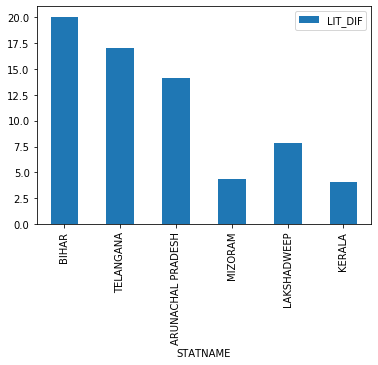

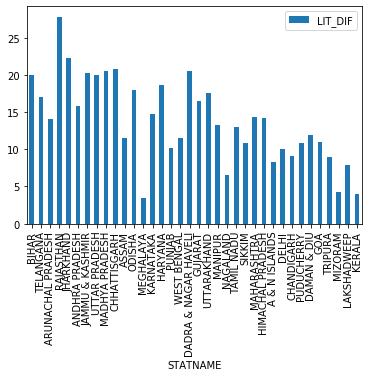

In [133]:
li.iloc[[0,1,2,33,34,35]].plot.bar()
li.plot.bar()

In [134]:
li.sort_vafig = go.Figure()

fig.add_trace(go.Bar(
    y=li.index,
    x=li['LIT_DIF'],
    name='Difference in Male & Female Literacy Levels',
                orientation='h'))

fig.update_layout(
    autosize=False,
    width=900,
    height=600,
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()


In [65]:
north_east = ['NAGALAND','MANIPUR','MIZORAM','ASSAM','TRIPURA','ARUNACHAL PRADESH','MEGHALAYA','SIKKIM']
ne_diff_lit = li.loc[north_east,'LIT_DIF' ]
ne_diff_lit

STATNAME
NAGALAND              6.60
MANIPUR              13.32
MIZORAM               4.32
ASSAM                11.54
TRIPURA               9.03
ARUNACHAL PRADESH    14.12
MEGHALAYA             3.39
SIKKIM               10.86
Name: LIT_DIF, dtype: float64

In [146]:
north = ['JAMMU & KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB', 'CHANDIGARH', 'RAJASTHAN', 'HARYANA', 'DELHI']
south = ['ANDHRA PRADESH', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'TAMIL NADU', 'PUDUCHERRY', 'A & N ISLANDS', 'TELANGANA']
centre = ['UTTARAKHAND', 'UTTAR PRADESH', 'CHHATTISGARH', 'MADHYA PRADESH']
east = ['BIHAR', 'WEST BENGAL', 'JHARKHAND', 'ODISHA']
west = ['GUJARAT', 'DAMAN & DIU', 'DADRA & NAGAR HAVELI', 'MAHARASHTRA', 'GOA']
north_east = ['NAGALAND','MANIPUR','MIZORAM','ASSAM','TRIPURA','ARUNACHAL PRADESH','MEGHALAYA','SIKKIM']


In [247]:
zon = se.copy().set_index('STATNAME')
n = zon.loc[north].mean()
s = zon.loc[south].mean()
c = zon.loc[centre].mean()
e = zon.loc[east].mean()
w = zon.loc[west].mean()
ne = zon.loc[north_east].mean()
zons = pd.DataFrame({'north': n, 'south': s, 'centre': c, 'east': e, 'eest': w, 'north_east':ne, })
zons = zons.T
zons['OVERALL_LI']

north         77.952857
south         81.128750
centre        72.755000
east          70.495000
eest          82.868000
north_east    79.637500
Name: OVERALL_LI, dtype: float64

In [249]:
zone = se.copy().set_index('STATNAME')
n1 = zone.loc[north]
zons['OVERALL_LI']['north']=((n1['OVERALL_LI']*n1['TOTPOPULAT']).sum()).sum()/(n1['TOTPOPULAT'].sum())

n1 = zone.loc[south]
zons['OVERALL_LI']['south']=((n1['OVERALL_LI']*n1['TOTPOPULAT']).sum()).sum()/(n1['TOTPOPULAT'].sum())

n1 = zone.loc[east]
zons['OVERALL_LI']['east']=((n1['OVERALL_LI']*n1['TOTPOPULAT']).sum()).sum()/(n1['TOTPOPULAT'].sum())

n1 = zone.loc[west]
zons['OVERALL_LI']['west']=((n1['OVERALL_LI']*n1['TOTPOPULAT']).sum()).sum()/(n1['TOTPOPULAT'].sum())

n1 = zone.loc[north_east]
zons['OVERALL_LI']['north_east']=((n1['OVERALL_LI']*n1['TOTPOPULAT']).sum()).sum()/(n1['TOTPOPULAT'].sum())

n1 = zone.loc[centre]
zons['OVERALL_LI']['centre']=((n1['OVERALL_LI']*n1['TOTPOPULAT']).sum()).sum()/(n1['TOTPOPULAT'].sum())
zons['OVERALL_LI']

north         73.281577
south         76.759068
centre        70.369815
east          75.507225
eest          82.868000
north_east    75.573784
west          81.699313
Name: OVERALL_LI, dtype: float64

In [250]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y=zons.index,
    x=zons['OVERALL_LI'],
    name='Literacy Levels',
                orientation='h'))


fig.show()


In [251]:
zone = se.copy().set_index('STATNAME')
n1 = zone.loc[north]
zons['FEMALE_LIT']['north']=((n1['FEMALE_LIT']*n1['TOTPOPULAT']).sum()).sum()/(n1['TOTPOPULAT'].sum())

n1 = zone.loc[south]
zons['FEMALE_LIT']['south']=((n1['FEMALE_LIT']*n1['TOTPOPULAT']).sum()).sum()/(n1['TOTPOPULAT'].sum())

n1 = zone.loc[east]
zons['FEMALE_LIT']['east']=((n1['FEMALE_LIT']*n1['TOTPOPULAT']).sum()).sum()/(n1['TOTPOPULAT'].sum())

n1 = zone.loc[west]
zons['FEMALE_LIT']['west']=((n1['FEMALE_LIT']*n1['TOTPOPULAT']).sum()).sum()/(n1['TOTPOPULAT'].sum())

n1 = zone.loc[north_east]
zons['FEMALE_LIT']['north_east']=((n1['FEMALE_LIT']*n1['TOTPOPULAT']).sum()).sum()/(n1['TOTPOPULAT'].sum())

n1 = zone.loc[centre]
zons['FEMALE_LIT']['centre']=((n1['FEMALE_LIT']*n1['TOTPOPULAT']).sum()).sum()/(n1['TOTPOPULAT'].sum())


north         62.795452
south         70.176463
centre        59.925553
east          68.913183
eest          74.714000
north_east    70.151747
west          73.879162
Name: FEMALE_LIT, dtype: float64

In [252]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y=zons.index,
    x=zons['FEMALE_LIT'],
    name='Female Literacy Levels',
                orientation='h'))


fig.show()


In [ ]:
zone = se.copy().set_index('STATNAME')
n1 = zone.loc[north].mean()


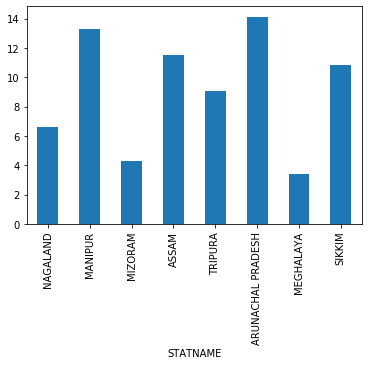

9.1475
13.89361111111111


In [66]:
ne_diff_lit.plot.bar()
plt.show()
print(ne_diff_lit.mean())
print(*li.mean())

In [72]:
#Enrollment by grade
df5=se.copy()[['STATNAME','C1_B','C2_B','C3_B','C4_B','C5_B','C6_B','C7_B','C8_B','C9_B','C1_G','C2_G','C3_G','C4_G','C5_G','C6_G','C7_G','C8_G','C9_G','TOTPOPULAT']]
df5=df5.groupby(['STATNAME']).mean()
df6=se.copy()[['STATNAME']]
fig=go.Figure()
df6['a']=df5[df5.columns[0]]+df5[df5.columns[0+9]]

df6=df6.groupby(['STATNAME']).mean()

for i in range(0,10):
    df6['Grade '+str(i+1)]=(df5[df5.columns[i]]+df5[df5.columns[i+9]])
    if i==8:
        break
df6.drop('a', axis=1, inplace=True)
df6.drop('TELANGANA', axis=0, inplace= True)

for i in df6.columns:
    fig.add_trace(go.Bar(x=df6.index, y=df6[i],
                    name=i))
fig.show()
df6.head()

,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9
STATNAME,,,,,,,,,
A & N ISLANDS,6259,6295,6288,6229,6335,6294,6273,6140,6890
ANDHRA PRADESH,687345,722695,714981,713279,708388,698983,701191,664448,643769
ARUNACHAL PRADESH,57224,46920,41839,38503,36744,35501,33235,32492,29151
ASSAM,898488,759411,717958,682790,662274,604319,568873,537940,543437
BIHAR,3392382,3194536,3305396,3139774,3138000,2550091,2407456,2304150,1805886


In [69]:
#Enrollment by grade
df5=se.copy()[['STATNAME','C1_B','C2_B','C3_B','C4_B','C5_B','C6_B','C7_B','C8_B','C9_B','C1_G','C2_G','C3_G','C4_G','C5_G','C6_G','C7_G','C8_G','C9_G','TOTPOPULAT']]
df5=df5.groupby(['STATNAME']).mean()
df6=se.copy()[['STATNAME']]
fig=go.Figure()
df6['a']=df5[df5.columns[0]]+df5[df5.columns[0+9]]

df6=df6.groupby(['STATNAME']).mean()

for i in range(0,9):
    df6['Grade '+str(i+1)]=(df5[df5.columns[i]]+df5[df5.columns[i+9]])/df5['TOTPOPULAT']
    if i==8:
        break
df6.drop('a', axis=1, inplace=True)
df6.drop('TELANGANA', axis=0, inplace= True)
for i in df6.columns:
    fig.add_trace(go.Bar(x=df6.index, y=df6[i],
                    name=i))
fig.show()
df6.head()

,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9
STATNAME,,,,,,,,,
A & N ISLANDS,16.471053,16.565789,16.547368,16.392105,16.671053,16.563158,16.507895,16.157895,18.131579
ANDHRA PRADESH,8.118312,8.535835,8.444724,8.424621,8.366853,8.255770,8.281849,7.847873,7.603631
ARUNACHAL PRADESH,41.376717,33.926247,30.252350,27.840202,26.568330,25.669559,24.031092,23.493854,21.078091
ASSAM,28.826334,24.364304,23.034361,21.906061,21.247842,19.388463,18.251243,17.258815,17.435176
BIHAR,32.680333,30.774394,31.842358,30.246847,30.229758,24.566167,23.192101,22.196908,17.396908


In [74]:
#Enrollment by grade
df5=se.copy()[['STATNAME','C1_B','C2_B','C3_B','C4_B','C5_B','C6_B','C7_B','C8_B','C9_B','C1_G','C2_G','C3_G','C4_G','C5_G','C6_G','C7_G','C8_G','C9_G','TOTPOPULAT','OVERALL_LI']]
df5=hig_low(df5,'OVERALL_LI')
df6=df5.copy()[['STATNAME']]
df5=df5.groupby(['STATNAME']).mean()
# df6=se.copy()[['STATNAME']]
fig=go.Figure()
df6['a']=df5[df5.columns[0]]+df5[df5.columns[0+9]]

df6=df6.groupby(['STATNAME']).mean()

for i in range(0,9):
    df6['Grade '+str(i+1)]=(df5[df5.columns[i]]+df5[df5.columns[i+9]])/df5['TOTPOPULAT']
    if i==8:
        break
df6.drop('a', axis=1, inplace=True)
df6.drop('TELANGANA', axis=0, inplace= True)
for i in df6.columns:
    fig.add_trace(go.Bar(x=df6.index, y=df6[i],
                    name=i))
fig.show()

KeyError: "['a'] not found in axis"

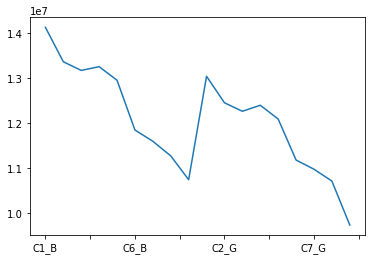

In [265]:
#Enrollment by grade
df5=se.copy()[['C1_B','C2_B','C3_B','C4_B','C5_B','C6_B','C7_B','C8_B','C9_B','C1_G','C2_G','C3_G','C4_G','C5_G','C6_G','C7_G','C8_G','C9_G']]
# df5=hig_low(df5,'OVERALL_LI')
df5.sum().plot()
# df6=df5.copy()[['STATNAME']]
# df5=df5.groupby(['STATNAME']).mean()
# # df6=se.copy()[['STATNAME']]
fig=go.Figure()
df5['a']=df5[df5.columns[0]]+df5[df5.columns[0+9]]

# df6=df6.groupby(['STATNAME']).mean()

for i in range(0,9):
    df5['Grade '+str(i+1)]=(df5[df5.columns[i]]+df5[df5.columns[i+9]])
    if i==8:
        break
df6.drop('a', axis=1, inplace=True)
# df6.drop('TELANGANA', axis=0, inplace= True)
for i in df6.columns:
    fig.add_trace(go.Bar(x=df6.index, y=df6[i],
                    name=i))
fig.show()

In [99]:
hilo=hig_low(se,'OVERALL_LI').set_index('STATNAME')
hilo.drop('TELANGANA', inplace=True)
hilo

,AC_YEAR,STATCD,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,...,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
STATNAME,,,,,,,,,,,,,,,,,,,,,
KERALA,2015-16,32,14,166,1907,1375,33388,24.76,9.95,44.86,...,1418,3561,675,51419,43025,31335,5327,15449,17752,3936
LAKSHADWEEP,2015-16,31,1,3,10,9,64,41.86,11.00,6.23,...,0,2395,209,139,150,49,15,28,11,0
MIZORAM,2015-16,15,8,36,851,169,1091,40.42,15.17,22.78,...,98,4917,1386,6593,3267,0,4575,0,0,0
BIHAR,2015-16,10,38,537,40779,5633,103805,8.36,17.90,25.07,...,26429,49110,3614,147323,272919,11332,2481,475,23095,927
ARUNACHAL PRADESH,2015-16,12,20,99,2982,234,1383,16.48,14.66,25.92,...,188,5497,504,8564,9020,820,202,304,2022,206
RAJASTHAN,2015-16,8,33,302,41441,10594,68621,19.26,15.31,21.44,...,11705,40162,2701,125798,253514,120330,979,5189,86126,1720


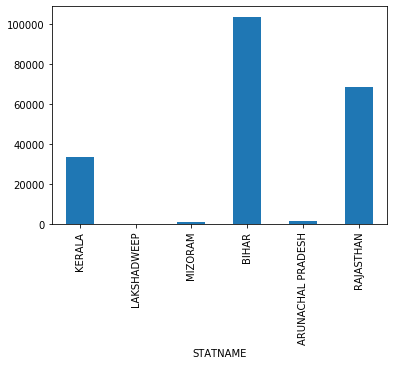

In [100]:
hilo['TOTPOPULAT'].plot.bar()

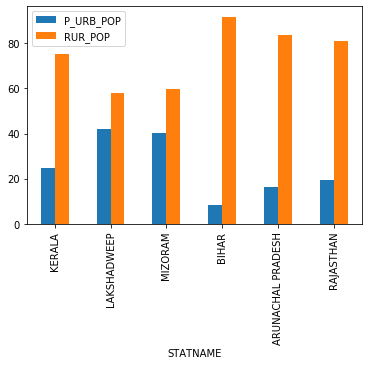

In [104]:
hilo['RUR_POP'] = 100 - hilo['P_URB_POP']
hilo[['P_URB_POP','RUR_POP']].plot.bar()


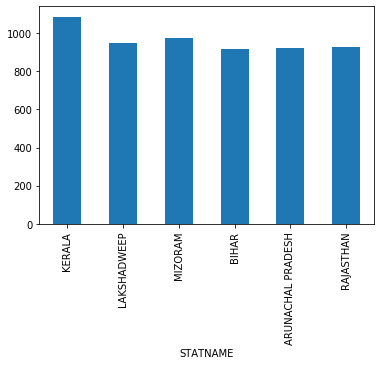

In [105]:
hilo['SEXRATIO'].plot.bar()


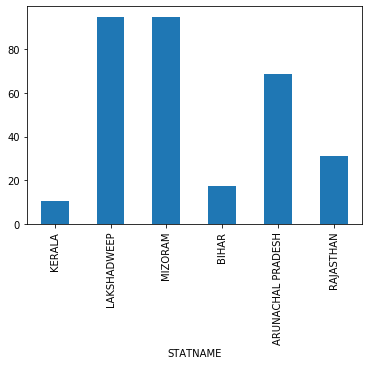

In [106]:
hilo['SC_ST'] = hilo['P_SC_POP']+hilo['P_ST_POP']
hilo['SC_ST'].plot.bar()


In [ ]:
hilo['TOTPOPULAT'].plot.bar()


In [ ]:
hilo['TOTPOPULAT'].plot.bar()


In [ ]:
hilo['TOTPOPULAT'].plot.bar()


In [ ]:
hilo['TOTPOPULAT'].plot.bar()


In [7]:
#Reading Districtwise data detailing Education in India
df=pd.read_csv(r'2015_16_Districtwise.csv')
df.head()

,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,...,UUNI_ALL,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,...,21322,26,2594,3489,5315,27,62,23,852,239
1,2015-16,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,...,17307,0,1571,4127,5800,210,53,30,1665,360
2,2015-16,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,...,5444,31,408,817,3284,886,11,0,2873,40
3,2015-16,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,...,12469,18,857,2290,3837,119,45,8,1035,325
4,2015-16,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,...,7408,17,855,1688,2584,151,67,5,1101,209


In [8]:
#Reading the Districtwise Metadata which allows us to see what each column head means
ad=pd.read_csv(r'2015_16_Districtwise_metadata.csv')
ad.tail(10)

,Field Name,Description
811,UUNI_ALL,Incentives_Upper_Primary_Uniform: All_
812,UUNI_SC,Incentives_Upper_Primary_Uniform: SC
813,UUNI_ST,Incentives_Upper_Primary_Uniform: ST
814,TOTCLS1G,Total_Classrooms_Primary_Only: Primary_Only
815,TOTCLS2G,Total_Classrooms_Primary_with_Upper_Primary: P...
816,TOTCLS3G,Total_Classrooms_Primary_with_upper_Primary_Se...
817,TOTCLS4G,Total_Classrooms_Upper_Primary_Only: Upper_Pri...
818,TOTCLS5G,Total_Classrooms_Upper_Primary_with_Sec./H.Sec...
819,TOTCLS6G,Total_Classrooms_Primary_with_upper_Primary_Se...
820,TOTCLS7G,Total_Classrooms_Upper_Primary_with_Sec.: Uppe...


In [9]:
ad[ad['Field Name']=='TOTCLS1G']['Description']

814    Total_Classrooms_Primary_Only: Primary_Only
Name: Description, dtype: object

In [10]:
df.describe()

,STATCD,DISTCD,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,...,UUNI_ALL,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
count,680.000000,680.000000,680.0,680.000000,680.000000,680.000000,6.340000e+02,631.000000,6.330000e+02,634.000000,...,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,17.292647,1745.976471,1.0,10.760294,874.614706,121.226471,1.899024e+06,24.819255,2.494264e+05,17.627886,...,46465.307353,11444.252941,5485.394118,4530.914706,3180.994118,764.154412,898.879412,391.352941,717.679412,385.957353
std,9.451743,944.257509,0.0,9.585360,622.711657,94.040172,1.547475e+06,19.093744,1.985112e+05,11.346020,...,57485.560854,16548.586787,9455.045146,3881.154776,3332.333288,1330.305834,1425.313485,820.868908,1194.616699,935.196354
min,1.000000,101.000000,1.0,1.000000,6.000000,1.000000,7.948000e+03,-25.350000,1.103980e+03,-58.390000,...,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,937.750000,1.0,5.000000,390.750000,56.750000,8.226940e+05,11.375000,1.087804e+05,12.052500,...,7534.000000,736.750000,165.250000,1903.750000,674.750000,68.000000,17.000000,17.000000,137.000000,20.750000
50%,18.000000,1823.500000,1.0,8.000000,785.500000,101.000000,1.564392e+06,19.500000,2.040779e+05,17.055000,...,32185.500000,6816.500000,1321.000000,3555.000000,1922.500000,249.500000,129.500000,70.500000,407.000000,115.500000
75%,24.000000,2413.250000,1.0,13.000000,1204.250000,162.500000,2.587520e+06,32.420000,3.378675e+05,22.740000,...,60492.750000,15300.500000,6183.500000,5944.250000,4870.500000,887.750000,1383.000000,462.000000,824.500000,319.500000
max,36.000000,3610.000000,1.0,66.000000,3963.000000,592.000000,1.105413e+07,100.000000,1.256855e+06,111.010000,...,511213.000000,153047.000000,68723.000000,24728.000000,25677.000000,16053.000000,8590.000000,8074.000000,15458.000000,11904.000000


In [11]:
df1=df.copy().set_index('DISTNAME')[['OVERALL_LI']]
df1

,OVERALL_LI
DISTNAME,
KUPWARA,66.92
BARAMULA,66.93
SRINAGAR,71.21
BADGAM,57.98
PULWAMA,65.00
...,...
RANGA REDDY,78.05
MAHBUBNAGAR,56.06
NALGONDA,65.05


In [12]:
df1.describe()

,OVERALL_LI
count,634.000000
mean,73.395189
std,10.098460
min,37.220000
25%,66.437500
50%,73.490000
75%,80.815000
max,98.760000


In [13]:
#Finding out the district with highest literacy rate
df1.idxmax()

OVERALL_LI    SERCHHIP
dtype: object

In [14]:
df3=df.copy()[['DISTNAME','OVERALL_LI']]
lit1=df3.groupby(['DISTNAME']).mean()
lit1=lit1.sort_values('OVERALL_LI',ascending=False) 
fig = go.Figure(data=go.Bar(x=lit1.index,y=lit1['OVERALL_LI']))
fig.show()

### If unable to view the generated plots, [Click here](https://nbviewer.jupyter.org/github/rishabh-runwal/education-india/blob/master/Education-India.ipynb)

Note: you may need to restart the kernel to use updated packages.


ERROR: basemap-1.0.8-cp34-none-win_amd64.whl is not a supported wheel on this platform.


In [112]:
col_des("TOTPOPULAT")

"Basic data from Census 2011: Total Population(in 1000's)"

In [ ]:
2110548